<a href="https://colab.research.google.com/github/HydrOpOtesJA99/Study/blob/main/Heatmap_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heatmap 그리기

> 출처: https://rfriend.tistory.com/419



## 1. module 불러오기

In [ ]:
# module 불러오기
import numpy as np
import pandas as pd

## 2. 파이썬 시각화 도구



1.   matplotlib
2.   seaborn

*   seaborn은 matplot 대비 손쉽게 그래프를 그리고 그래프 스타일 설정가능

*    matplotlib은 정교하게 그래프 크기 조절 시에는 seaborn과 같이 사용





>   Seaborn 라이브러리에서 제공하는 그래프(plot)의 종류



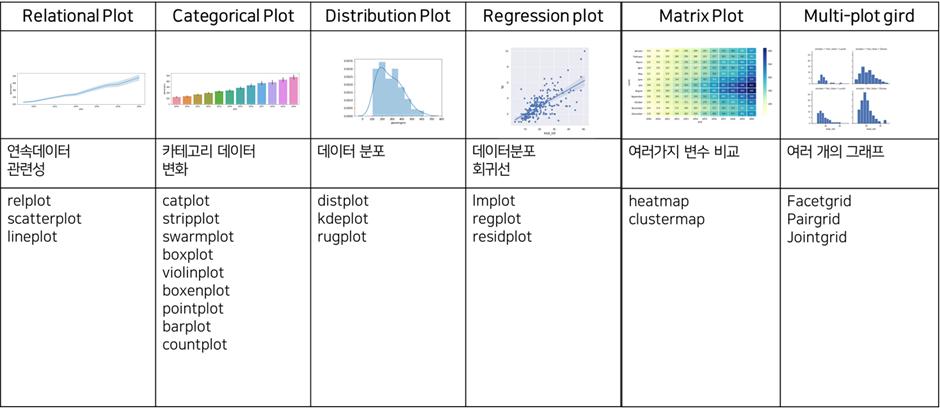

In [ ]:
# matplotlib, seaborn 불러오기
import matplotlib.pyplot as plt 
import seaborn as sns  

plt.rcParams['figure.figsize'] = [10,8] # 인치 단위로 도형 크기를 설정

## 3. flights 데이터프레임 출력 및 확인

In [ ]:
# flights 변수에 flights dataset 지정
flights = sns.load_dataset('flights')

In [ ]:
# (행,열) 크기 확인
flights.shape

In [ ]:
# Column(열)명 확인
flights.columns

In [ ]:
# Dataset 정보확인
flights.info()

# 0 ~ 143행: 144개 row(행)으로 구성
# 3개의 columns(열) 가짐
# 0번째 column Datatype: int64
# 1번째 column Datatype: category
# 2번째 column Datatype: int64

In [ ]:
# 앞에서 5개 출력
flights.head()

In [ ]:
# 뒤에서 5개 출력
flights.tail() 

In [ ]:
# print 함수를 이용한 dataset 출력
a = flights.head()
b = flights.tail()

print(type(a), type(b))
print(a)
print(flights[5:10]) # 5 ~ 9행을 출력
print(b)

## 3.1 flights 데이터프레임 pivot 

In [ ]:
# pivot() 함수를 이용해 년도별 월별 
# 여러 분류로 섞인 행 데이터를 열 데이터로 회전시키는 것을 pivot이라고 한다
df_pivoted = flights.pivot(index = 'month', columns = 'year', values = 'passengers')

# 행(row, index) 열(column), 값(value) 순으로 차례로 값을 넣어도 됨
# df = flights.pivot('month', 'year', 'passengers')

print(df_pivoted)

## 4. Heatmap 그리기

### 4.1 matplotlib를 이용한 Heatmap 그리기

### * numpy.arrange 
*   numpy.arrange([시작값], [종료값; 미포함], [간격(step) 값; default=1])
*   [시작값]에서 [종료값-1]까지 갑 [간격 값] 만큼의 간격으로 값을 반환한다

In [ ]:
# numpy.arrange example
np.arange(4)

# print(np.arange(1,4))  
# answer: [1 2 3]

# np.arange(1, 4, 0.5)
# answer: array([1. , 1.5, 2. , 2.5, 3. , 3.5])

In [ ]:
# matplotlib 이용한 히트맵 그리기
# 출처: https://wikidocs.net/92089

# Heatmap에 색상을 넣어준다, 아래 결과의 색상이 default값
plt.pcolor(df_pivoted)

# 틱(tick: 그래프의 축에 간격을 구분하기 위해 표시하는 눈금)을 설정
plt.xticks(np.arange(0.5, len(df_pivoted.columns),1), df_pivoted.columns) 
# 0.5: 틱을 0.5 부터 pivot
# len(df_pivoted.columns) : pivot table의 열(year) 개수
# np.arange(0.5, len(df_pivoted.index), 1) : 0.5, 1.5, 2.5, ~ 10.5, 11.5
# df_pivoted.columns : x축 tick naming은 pivot 테이블 column 사용

plt.yticks(np.arange(0.5, len(df_pivoted.index), 1), df_pivoted.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20) # Heatmap의 제목 작성
plt.xlabel('Year', fontsize=14) # xlabel 제목 설정
plt.ylabel('Month', fontsize=14) # ylabel 제목 설정
plt.colorbar() # 오른쪽 color 기준표 출력 

plt.show() # 출력

### 4.2 seaborn을 이용한 Heatmap 그리기

In [ ]:
# ax = sns.heatmap([input_data]  # input data 
#                 vmin = [value]  # 색상 최솟값 
#                 vmax = [value]  # 색상 최댓값
#                 cbar = True or False  # colorbar 유무
#                 center = [value]  # 색상 중앙값 선정
#                 linewidths = [value]  # cell사이 구분선 삽입
#                 annot = True or False, fmt= [datatype]  # 각 cell의 값 유무, 그 값의 데이터 타입 설정
#                 cmap = [color type]  # 히트맵의 색 설정

In [ ]:
# seaborn은 데이터가 2차원 피벗 테이블 형태의 DataFrame으로 집계되어있으면 매우간단히 히트맵 그림
ax = sns.heatmap(df_pivoted)
plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.show()

#### 4.2.1 셀에 값을 입력

In [ ]:
# 각 셀에 숫자를 입력
sns.heatmap(df_pivoted,  # input data
            annot=True, fmt='d') # cell 위에 숫자 입력, fmt='d': 입력 숫자는 정수형태
plt.title('Annoteat cell with numeric value', fontsize = 20)

plt.show()

#### 4.2.2 cmap을 이용한 다양한 색상의 Heatmap 그리기

In [ ]:
# matplot color map(cmap) 종류
# 출처: https://jrc-park.tistory.com/155

import matplotlib.cm

print(matplotlib.cm.cmap_d.keys())

In [ ]:
# google drive에서 사진 불러오기
from IPython.display import Image
Image('/content/drive/MyDrive/다운로드.png')

In [ ]:
# cmap = 'RdYlGn'로 설정해 Heatmap 그리기
sns.heatmap(df_pivoted, 
            cmap='RdYlGn') # Rd - Red, Yl(L임) - Yellow, Gn - Green 순으로 cell 칠함
plt.title('colormap of cmap=RdYIGn', fontsize=20)

plt.show()

In [ ]:
# cmap = 'RdYlGn'에 _r(reverse) 인자를 추가한 'RdYlGn_r'로 설정해 Heatmap 그리기
sns.heatmap(df_pivoted, 
            cmap='RdYlGn_r') # _r(reverse) 추가 되었으므로 Gn(Green), Yl(Yellow), Rd(Red) 순으로 cell 칠함
plt.title('colormap of cmap=RdYIGn_r', fontsize=20)

plt.show()

In [ ]:
# cmap = 'YIGnBu'로 설정해서 파란색, 노란색 계열로 변환
# different colormap
sns.heatmap(df_pivoted, 
            cmap='YlGnBu') # Yl(Yellow), Gn(Green), Bu(Blue) 순으로 cell 칠함
plt.title('colormap of cmap=YlGnBu', fontsize=20)

plt.show()

#### 4.2.3 center를 이용해 특정 값을 색상 중앙값으로한 히트맵 그리기

In [ ]:
# default Heatmap
sns.heatmap(df_pivoted,
            cmap = 'RdYlGn_r',
            annot = True, fmt='d',) # default Heatmap  
plt.title('Center the colomap at Jan. 1949', fontsize=20)

plt.show

In [ ]:
# Heatmap의 색을 1949년 1월 기준으로 히트맵 그리기
sns.heatmap(df_pivoted,
            cmap = 'RdYlGn_r', # Yellow가 색상 중앙값이고 이 색상을 Jan 1949 cell이 갖는다
            annot = True, fmt='d',
            center=df_pivoted.loc['Jan', 1949]) # Heatmap 색깔을 jan 1949를 기준으로 그리기  
plt.title('Center the colomap at Jan. 1949', fontsize=20)

plt.show

In [ ]:
# Heatmap의 색을 1960년 7월 기준으로 히트맵 그리기
sns.heatmap(df_pivoted,
            cmap = 'RdYlGn_r', # Yellow가 색상 중앙값이고 이 색상을 Jul 1960 cell이 갖는다
            annot = True, fmt='d',
            center=df_pivoted.loc['Jul', 1960]) # Heatmap 색깔을 jan 1949를 기준으로 그리기  
plt.title('Center the colomap at Jul. 1960', fontsize=20)

plt.show

In [ ]:
# Heatmap의 색을 1969년 12월 기준으로 히트맵 그리기
sns.heatmap(df_pivoted,
            cmap = 'RdYlGn_r', # Yellow가 색상 중앙값이고 이 색상을 Dec 1960 cell이 갖는다
            annot = True, fmt='d',
            center=df_pivoted.loc['Dec', 1960]) # Heatmap 색깔을 jan 1949를 기준으로 그리기  
plt.title('Center the colomap at Dec. 1960', fontsize=20)

plt.show

### 4.3 pandas를 이용한 Heatmap 그리기

In [ ]:
# pandas는 df.style.background_gradient(cmap='summer')로 DataFrame 숫자에 따라 "직접"(사진 파일로 출력되는게 아님) 색을 다르게 입힐 수 있다
df_pivoted.style.background_gradient(cmap='summer')